In [6]:
import json, time, pandas, requests
from datetime import datetime
from elasticsearch import Elasticsearch
import pandas as pd
import matplotlib.pyplot as plt

#Conexion Elastic Cloud
cs = Elasticsearch(["https://772081bee548459ba192da5a032f028e.us-east-1.aws.found.io:9243/"],http_auth=('elastic', 'UsJKCawkc9jsjh5cbRYOATvo'))

In [7]:
#Creamos un DataFrame para guardar los datos de Elasticsearch
mydf = pd.DataFrame(columns=('timestamp','exchange','pair','bidprice','bid_amount','ask_amount','ask_price'))

#Buscamos la cantidad de datos en Elasticsearch
count_value = cs.search(index="orderbooks-markets-spread", body={"query":{"match_all":{}}})
count = (count_value["hits"]["total"]["value"])
#print(count)
#Por defecto, la consulta de registros a Elasticseach solo nos arroja 10
#coun nos da la cantidad completa de registros que hay y se la pasamos a size
logs_index = "orderbooks-markets-spread"
my_query={}
#Consulta a Elasticsearch
data = cs.search(index=logs_index, body=my_query, size=count)

#Tarda aprox 40 segundos, son 10,000 registros
for iteration in range(count):
    bid_price = data["hits"]["hits"][iteration]["_source"]["bid_price"]
    bid_amount = data["hits"]["hits"][iteration]["_source"]["bid_amount"]
    ask_price = data["hits"]["hits"][iteration]["_source"]["ask_price"]
    ask_amount = data["hits"]["hits"][iteration]["_source"]["ask_amount"]
    timestamp = data["hits"]["hits"][iteration]["_source"]["timestamp"]
    mydf.loc[len(mydf)]=[timestamp,'bitmex','btcusd-perpetual-futures',bid_price,bid_amount,ask_price,ask_amount] 



In [8]:
#Convertimos los tipo de datos para las columnas de dataframe
#print(mydf)
mydf[['bidprice','bid_amount','ask_amount','ask_price']] = mydf[['bidprice','bid_amount','ask_amount','ask_price']].astype(numeric)
mydf['timestamp'] = pd.to_datetime(mydf['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f') 

In [20]:
mydf.head()
#mydf.dtypes


,timestamp,exchange,pair,bidprice,bid_amount,ask_amount,ask_price
0,2020-01-17 05:57:15.196,bitmex,btcusd-perpetual-futures,8872.5,22581.0,8873.0,992408.0
1,2020-01-17 05:57:15.697,bitmex,btcusd-perpetual-futures,8872.5,572826.0,8873.0,1244716.0
2,2020-01-17 05:57:12.397,bitmex,btcusd-perpetual-futures,8874.0,372025.0,8874.5,1689027.0
3,2020-01-17 05:57:13.021,bitmex,btcusd-perpetual-futures,8874.0,552071.0,8874.5,1663566.0
4,2020-01-17 05:57:13.595,bitmex,btcusd-perpetual-futures,8874.0,145592.0,8874.5,1842808.0


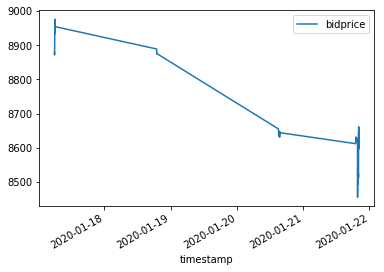

In [26]:
#mydf.drop(mydf.columns[[0, 7]], axis='columns')
#mydf.set_index('timestamp')
#mydf.head()

my_plot = mydf.plot("timestamp", "bidprice",)


In [ ]:
#Condiciones 
x = 2
if x > 3 and x < 6:
    print (x)
else:
    print("No coindice")
    
    